In [1]:
%%capture
import matplotlib.pyplot as plt
import numpy as np

import pywt
import pywt.data
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

from sklearn.metrics import mean_squared_error
from math import sqrt

from ipynb.fs.full.task1 import convert_pgm_to_matrix, show_image_greyscale

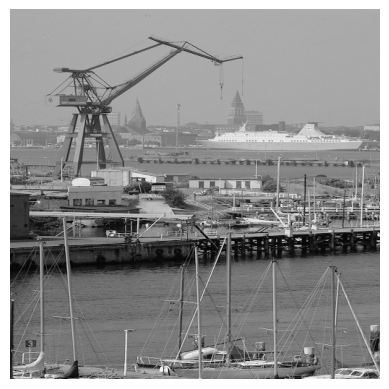

In [3]:
# Load image
im = convert_pgm_to_matrix("./Dataset/kiel.pgm")
show_image_greyscale(im)

In [148]:
import numpy as np
from scipy.signal import convolve

# Define Haar wavelet filters
L = np.array([1, 1]) / np.sqrt(2)  # Low-pass filter
H = np.array([1, -1]) / np.sqrt(2)  # High-pass filter

def forward_wavelet_transform(matrix):
    """
    Perform forward wavelet transform (single level) on a 2D matrix.
    
    Args:
        matrix (ndarray): Input 2D matrix (grayscale image).
    
    Returns:
        tuple: LL, LH, HL, HH subbands as 2D matrices.
    """
    rows, cols = matrix.shape

    # Step 1: Row-wise decomposition
    # Initialize intermediate matrices for approximation and detail coefficients
    approx_rows = np.zeros((rows, cols // 2))  # Low-pass result along rows
    detail_rows = np.zeros((rows, cols // 2))  # High-pass result along rows

    for i in range(rows):
        row = matrix[i, :]

        # Convolve with low-pass (L) and high-pass (H), then downsample
        approx_rows[i, :] = convolve(row, L, mode='valid')[::2]
        detail_rows[i, :] = convolve(row, H, mode='valid')[::2]

    # Step 2: Column-wise decomposition
    LL = np.zeros((rows // 2, cols // 2))  # Low-pass along rows, then columns
    LH = np.zeros((rows // 2, cols // 2))  # Low-pass rows, high-pass columns
    HL = np.zeros((rows // 2, cols // 2))  # High-pass rows, low-pass columns
    HH = np.zeros((rows // 2, cols // 2))  # High-pass rows, high-pass columns

    for j in range(cols // 2):
        col_approx = approx_rows[:, j]
        col_detail = detail_rows[:, j]

        # Convolve with low-pass (L) and high-pass (H), then downsample
        LL[:, j] = convolve(col_approx, L, mode='valid')[::2]
        LH[:, j] = convolve(col_approx, H, mode='valid')[::2]
        HL[:, j] = convolve(col_detail, L, mode='valid')[::2]
        HH[:, j] = convolve(col_detail, H, mode='valid')[::2]

    return LL, LH, HL, HH

# Example usage
# Create a sample 4x4 input matrix
A = np.array([
    [2, 2, 4, 4],
    [6, 6, 8, 8],
    [10, 10, 14, 14],
    [12, 12, 16, 16]
])

# Perform forward transform
LL, LH, HL, HH = forward_wavelet_transform(im)

# Display results
# print("LL (Approximation):\n", LL)
# print("LH (Horizontal Details):\n", LH)
# print("HL (Vertical Details):\n", HL)
# print("HH (Diagonal Details):\n", HH)


In [13]:
# Define Haar wavelet filters
L = np.array([1, 1]) / np.sqrt(2)  # Low-pass filter
H = np.array([1, -1]) / np.sqrt(2)

In [14]:
L

array([0.70710678, 0.70710678])

(512, 256)


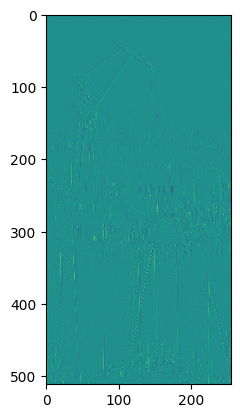

In [39]:
rows, cols = im.shape

# Step 1: Row-wise decomposition
# Initialize intermediate matrices for approximation and detail coefficients
approx_rows = np.zeros((rows, cols // 2))  # Low-pass result along rows
detail_rows = np.zeros((rows, cols // 2))  # High-pass result along rows


for i in range(rows):
    row = im[i]

    # Convolve with low-pass (L) and high-pass (H), then downsample
    approx_rows[i] = convolve(row, L, mode='valid')[::2]
    detail_rows[i] = convolve(row, H, mode='valid')[::2]

print(approx_rows.shape)
plt.imshow(detail_rows)

# Draft 1

In [204]:
num_rows = im.shape[0]
num_columns = im.shape[1]

# Using haar filter coefficient
low_pass_filter = np.array([1, 1]) / np.sqrt(2)
high_pass_filter = np.array([1, -1]) / np.sqrt(2)

# Prepare array to store the result of convoluting image's row through filter and down sampling the column by 2
## For low pass 
La = np.zeros((num_rows, int(num_columns/2)))
## For high pass
H = np.zeros((num_rows, int(num_columns/2)))

## Go through all rows
for i in range(num_rows):
    ## Stride by 2 to down-sampling by 2
    for j in range(num_columns//2):
        ## Apply dot product on the filter and part of an image
        La[i][j] = np.dot(low_pass_filter, im[i][j:j+2])
        H[i][j] = np.dot(high_pass_filter, im[i][j:j+2])

# Prepare array to store the result of convoluting L and H by columns and down sampling the row by 2
LL = np.zeros((num_rows//2, num_columns//2))  # Low-pass along rows, then columns
LH = np.zeros((num_rows // 2, num_columns // 2))  # Low-pass rows, high-pass columns
HL = np.zeros((num_rows // 2, num_columns // 2))  # High-pass rows, low-pass columns
HH = np.zeros((num_rows // 2, num_columns // 2))  # High-pass rows, high-pass columns

for i in range (num_rows//2):
    for j in range (num_columns//2):
        LL[i,j] = np.dot(low_pass_filter, L[i:i+2, j])
        LH[i,j] = np.dot(high_pass_filter, L[i:i+2, j])
        HL[i,j] = np.dot(low_pass_filter, H[i:i+2, j])
        HH[i,j] = np.dot(high_pass_filter, H[i:i+2, j])


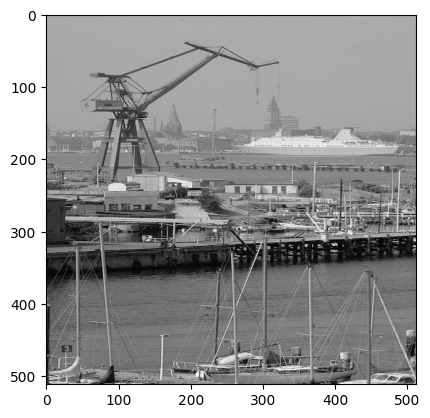

In [162]:
plt.imshow(im, cmap=plt.cm.gray)

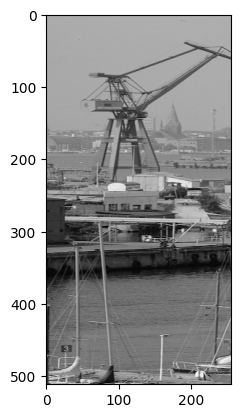

In [163]:
plt.imshow(L, cmap=plt.cm.gray)

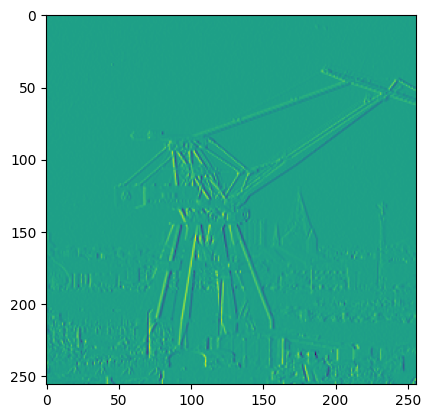

In [145]:
plt.imshow(HL)

In [120]:
np.dot(low_pass_filter, im[0:0+2, 0])

np.float64(0.9400360738127043)

In [90]:
low_pass_filter = np.array([1, 1]) / np.sqrt(2)  # Low-pass filter
low_pass_filter

array([0.70710678, 0.70710678])

In [85]:
im[0][0:0+2]

array([0.66666667, 0.6627451 ])

In [91]:
np.dot(low_pass_filter, im[0][0:0+2])

np.float64(0.9400360738127043)

In [69]:
im[0][0:0+2]

array([0.66666667, 0.6627451 ])

In [70]:
low_pass_filter

array([0.70710678, 0.70710678])

In [71]:
x1 = np.arange(9.0).reshape((3, 3))
x2 = np.arange(3.0)

In [72]:
x1

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [73]:
x2

array([0., 1., 2.])

In [152]:
padded_im = np.pad(im, ((0, im.shape[0] % 2), (0, im.shape[1] % 2)), mode='constant')

In [153]:
padded_im.shape

(512, 512)

In [154]:
padded_im

array([[0.66666667, 0.6627451 , 0.6627451 , ..., 0.67843137, 0.67843137,
        0.67843137],
       [0.6627451 , 0.6627451 , 0.6627451 , ..., 0.67058824, 0.6745098 ,
        0.67058824],
       [0.6627451 , 0.6627451 , 0.66666667, ..., 0.67058824, 0.67058824,
        0.6745098 ],
       ...,
       [0.17254902, 0.12156863, 0.23921569, ..., 0.37254902, 0.75686275,
        0.77647059],
       [0.17647059, 0.1254902 , 0.2745098 , ..., 0.43921569, 0.88235294,
        0.61176471],
       [0.17647059, 0.11372549, 0.29411765, ..., 0.70980392, 0.8627451 ,
        0.44313725]])

In [155]:
padded_A = np.pad(im, pad_width=((1, 1), (1, 1)), mode='constant', constant_values=0)


In [157]:
padded_A.shape

(514, 514)

In [189]:
def show_pic(pic):
    plt.imshow(pic, cmap=plt.cm.gray)

In [ ]:
def add_padding_to_the_right(im):
    right_padding = np.zeros((im.shape[0], 1))
    return np.concatenate((im, right_padding), axis=1)

def fdwt_haar_coeff(im):
    num_rows = im.shape[0]
    num_columns = im.shape[1]

    # Add padding to keep the information to add information in the last column
    im = add_padding_to_the_right(im)

    # Using haar filter coefficient
    low_pass_filter = np.array([1, 1]) / np.sqrt(2)
    high_pass_filter = np.array([1, -1]) / np.sqrt(2)

    # Prepare array to store the result of convoluting image's row through filter
    ## For low pass 
    L = np.zeros((num_rows, int(num_columns)))
    ## For high pass
    H = np.zeros((num_rows, int(num_columns)))

    ## Go through all rows. Stride by
    for i in range(num_rows):
        for j in range(num_columns):
            # Convolution should not go beyond the image
            if j+2 > num_columns - 1:
                break
            ## Apply dot product on the filter and part of an image
            L[i][j] = np.dot(low_pass_filter, im[i][j:j+2])
            H[i][j] = np.dot(high_pass_filter, im[i][j:j+2])

    ## Downsampling the column by 2
    L = L[:, ::2]
    H = H[:, ::2]

    # Prepare array to store the result of convoluting L and H by columns
    LL = np.zeros((num_rows, num_columns // 2))  # Low-pass along rows, then columns
    LH = np.zeros((num_rows, num_columns // 2))  # Low-pass rows, high-pass columns
    HL = np.zeros((num_rows, num_columns // 2))  # High-pass rows, low-pass columns
    HH = np.zeros((num_rows, num_columns // 2))  # High-pass rows, high-pass columns

    final = np.zeros((num_rows, num_columns))

    for i in range (L.shape[0]):
        for j in range (L.shape[1]):
            if i+2 > num_rows - 1:
                break
            LL[i,j] = np.dot(low_pass_filter, L[i:i+2, j])
            LH[i,j] = np.dot(high_pass_filter, L[i:i+2, j])
            HL[i,j] = np.dot(low_pass_filter, H[i:i+2, j])
            HH[i,j] = np.dot(high_pass_filter, H[i:i+2, j])
    
    ## Downsampling the row by 2
    LL = LL[::2, :]
    LH = LH[::2, :]
    HL = HL[::2, :]
    HH = HH[::2, :]
            
    return LL, LH, HL, HH 

In [245]:
pic, final = fdwt_haar_coeff(im)

In [242]:
pic.shape

(512, 512)

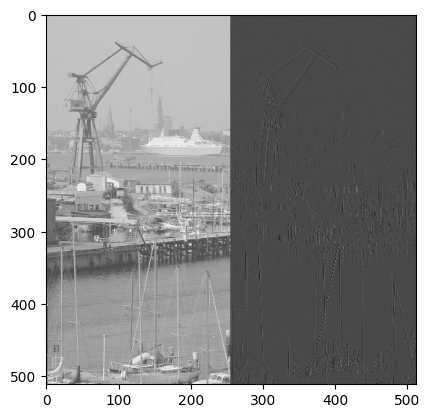

In [246]:
show_pic(pic)

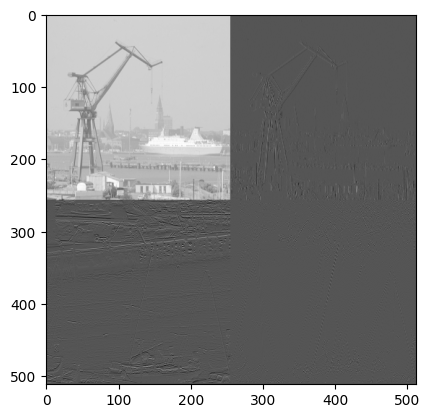

In [247]:
show_pic(final)

In [226]:
def fdwt_haar_coeff(im):
    num_rows = im.shape[0]
    num_columns = im.shape[1]

    # Using Haar filter coefficients
    low_pass_filter = np.array([1, 1]) / np.sqrt(2)
    high_pass_filter = np.array([1, -1]) / np.sqrt(2)

    # Prepare arrays to store the results
    L = np.zeros((num_rows, num_columns // 2))  # Low-pass result
    H = np.zeros((num_rows, num_columns // 2))  # High-pass result

    # Process each row
    for i in range(num_rows):
        for j in range(num_columns // 2):
            stride_by_2 = j * 2  # Move in steps of 2 for downsampling
            # Apply filters only if within valid range
            L[i, j] = np.dot(low_pass_filter, im[i, stride_by_2:stride_by_2 + 2])
            H[i, j] = np.dot(high_pass_filter, im[i, stride_by_2:stride_by_2 + 2])

    return L, H


In [227]:
L, H = fdwt_haar_coeff(im)

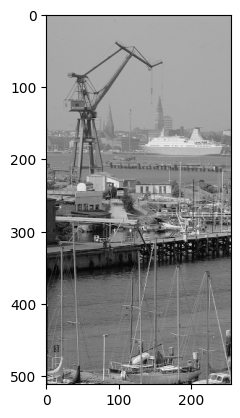

In [228]:
plt.imshow(L, cmap=plt.cm.gray)

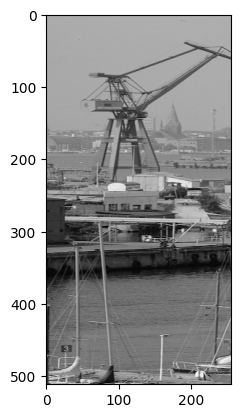

In [229]:
show_pic(La)